In [8]:
import numpy as np
import yroots as yr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#autoreload
%load_ext autoreload
%autoreload 2

In [9]:
# function to filter out roots outside of the interval (allows for nicer plots)
def rootfilter(roots,a,b,tol):
    roots = roots[np.all(roots >= a - tol,axis = 1)]
    roots = roots[np.all(roots <= b + tol,axis = 1)]
    return roots

def residuals(func, roots):
    return np.abs(func(roots[:,0],roots[:,1]))

def print_residuals(funcs, chebfun_roots, yroots):
    print("YRoots Residuals")
    print("Residuals for f: " + str(residuals(funcs[0], yroots)))
    print("Residuals for g: " + str(residuals(funcs[1], yroots)))

    print("Chebfun2 Residuals")
    print("Residuals for f: " + str(residuals(funcs[0], chebfun_roots)))
    print("Residuals for g: " + str(residuals(funcs[1], chebfun_roots)))

# `test_roots01`

Percent Finished: 100%         
Total intervals checked was 763
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.2621 98.2962  1.4417  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

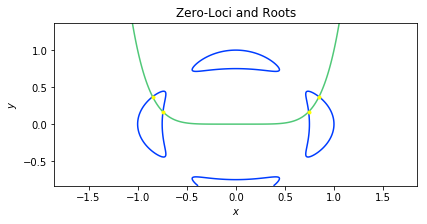

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.89205490e-13 8.52081862e-13 1.51644852e-13 1.69424190e-13]
YRoots Residuals
Residuals for f: [1.19371180e-11 1.80193638e-11 1.14539489e-11 7.53175300e-12]
Residuals for g: [3.53328478e-13 6.70546951e-13 4.33153513e-13 6.52811138e-14]
Chebfun2 Residuals
Residuals for f: [2.84217094e-14 4.26325641e-14 4.26325641e-14 2.84217094e-14]
Residuals for g: [6.66133815e-16 7.77156117e-16 7.77156117e-16 6.66133815e-16]


In [10]:
###test_roots01
#01
f = lambda x,y: 144*(x**4+y**4)-225*(x**2+y**2) + 350*x**2*y**2+81
g = lambda x,y: y-x**6

r1 = np.loadtxt('chebfun_test_output/cftest1_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

In [11]:
#02

#FREEZES
# When it can get an accurate approximation, the multiplication matrix condition number is too large on this particular interval.
# Oddly enough, this works just fine on the interval [-1, 1]^2, just not this interval.

f = lambda x,y: (y**2-x**3)*((y-0.7)**2-(x-0.3)**3)*((y+0.2)**2-(x+0.8)**3)*((y+0.2)**2-(x-0.8)**3)
g = lambda x,y: ((y+.4)**3-(x-.4)**2)*((y+.3)**3-(x-.3)**2)*((y-.5)**3-(x+.6)**2)*((y+0.3)**3-(2*x-0.8)**3)

r1 = np.loadtxt('chebfun_test_output/cftest1_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
    
print_residuals([f,g], r1, r2)

[-0.17632263 -0.99034609]
[0.9026376  0.39875632]
Percent Finished: 32.55%       

KeyboardInterrupt: 

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

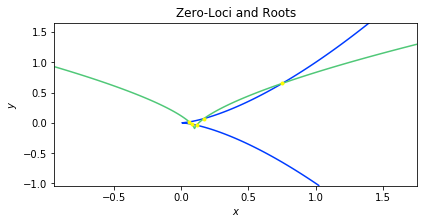

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[1.25463110e-12 1.72618538e-12 2.47837419e-12 4.58097704e-14
 1.11022302e-15]
YRoots Residuals
Residuals for f: [1.44328993e-15 2.65239219e-15 1.83657343e-14 5.79374331e-14
 8.85212585e-14]
Residuals for g: [1.88737914e-15 4.80518403e-16 1.37086523e-15 8.29035191e-16
 1.92229045e-15]
Chebfun2 Residuals
Residuals for f: [1.22785896e-16 8.52725009e-17 3.77302356e-17 1.71737624e-16
 0.00000000e+00]
Residuals for g: [8.93382590e-17 9.02056208e-17 1.76128643e-16 1.25767452e-16
 0.00000000e+00]


In [12]:
#03
f = lambda x,y: y**2-x**3
g = lambda x,y: (y+.1)**3-(x-.1)**2

r1 = np.loadtxt('chebfun_test_output/cftest1_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

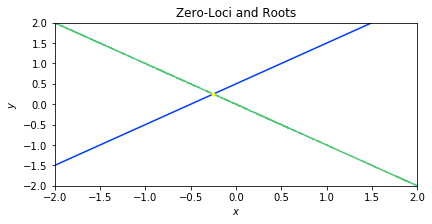

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and yroots solutions:
[2.77555756e-17]
YRoots Residuals
Residuals for f: 0.0
Residuals for g: 2.7755575615628914e-17
Chebfun2 Residuals
Residuals for f: 0.0
Residuals for g: 0.0


In [13]:
#04
f = lambda x,y: x - y + .5
g = lambda x,y: x + y

r1 = np.loadtxt('chebfun_test_output/cftest1_4.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and yroots solutions:')
print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print("YRoots Residuals")
print("Residuals for f: " + str(np.abs(f(r2[0][0], r2[0][1]))))
print("Residuals for g: " + str(np.abs(g(r2[0][0], r2[0][1]))))

print("Chebfun2 Residuals")
print("Residuals for f: " + str(np.abs(f(r1[0], r1[1]))))
print("Residuals for g: " + str(np.abs(g(r1[0], r1[1]))))

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

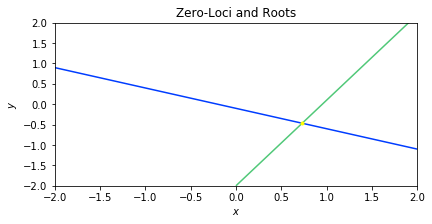

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and yroots solutions:
6.955527313080394e-16
YRoots Residuals
Residuals for f: 3.0531133177191805e-16
Residuals for g: 0.0
Chebfun2 Residuals
Residuals for f: 4.718447854656915e-16
Residuals for g: 0.0


In [14]:
#05
f = lambda x,y: y + x/2 + 1/10
g = lambda x,y: y - 2.1*x + 2

r1 = np.loadtxt('chebfun_test_output/cftest1_5.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and yroots solutions:')
print(np.linalg.norm(r1-r2[0]))

print("YRoots Residuals")
print("Residuals for f: " + str(np.abs(f(r2[0][0], r2[0][1]))))
print("Residuals for g: " + str(np.abs(g(r2[0][0], r2[0][1]))))

print("Chebfun2 Residuals")
print("Residuals for f: " + str(np.abs(f(r1[0], r1[1]))))
print("Residuals for g: " + str(np.abs(g(r1[0], r1[1]))))

# `test_roots02`

Percent Finished: 100%         
Total intervals checked was 3256
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [50.     48.9251  1.0749  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

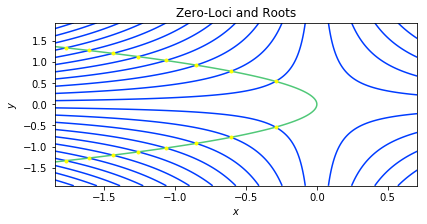

Number of roots: 6
Number found by yroots: 6
Distance between chebfun solutions and yroots solutions:
[1.71422753e-12 1.75859563e-12 2.91416379e-12 2.39791792e-12
 6.70649893e-13 1.31391233e-12]
YRoots Residuals
Residuals for f: [1.16729461e-11 1.11764544e-11 1.06091075e-11 2.87295103e-12
 6.88711916e-12 2.44812589e-12]
Residuals for g: [1.68542957e-12 2.14078755e-12 1.20958799e-12 3.01136893e-12
 2.70383715e-12 3.09330339e-12]
Chebfun2 Residuals
Residuals for f: [5.8201672e-16 5.8201672e-16 7.0448140e-16 7.0448140e-16 6.1232340e-17
 6.1232340e-17]
Residuals for g: [7.77156117e-16 7.77156117e-16 1.11022302e-16 1.11022302e-16
 1.66533454e-16 1.66533454e-16]


In [15]:
#01
f = lambda x,y: np.cos(10*x*y)
g = lambda x,y: x + y**2

r1 = np.loadtxt('chebfun_test_output/cftest2_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 3508
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.    95.268  4.732  0.     0.   ]


<Figure size 3600x2400 with 0 Axes>

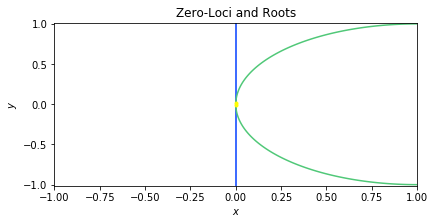

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[2.47456566e-10 1.34438122e-10]
YRoots Residuals
Residuals for f: [4.23516474e-22 0.00000000e+00]
Residuals for g: [3.80206977e-12 6.99862390e-12]
Chebfun2 Residuals
Residuals for f: [0. 0.]
Residuals for g: [3.33066907e-16 3.33066907e-16]


In [16]:
#02
f = lambda x,y: x
g = lambda x,y: (x-.9999)**2 + y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest2_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 1096
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [16.0584 81.6606  2.281   0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

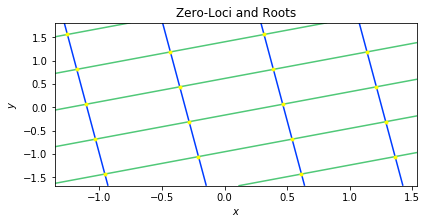

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[1.28931696e-13 5.56089036e-14 2.56186343e-12 1.39748736e-13
 5.94973895e-14]
YRoots Residuals
Residuals for f: [1.02630241e-11 1.36212923e-13 2.05490839e-13 5.65325564e-13
 1.08135723e-13]
Residuals for g: [4.92666446e-12 1.15279498e-13 2.09449295e-13 2.73497721e-13
 1.61809285e-13]
Chebfun2 Residuals
Residuals for f: [1.55431223e-15 1.33226763e-15 1.22464680e-16 1.01064310e-15
 1.65389216e-15]
Residuals for g: [3.82856870e-16 2.60330292e-15 1.83758918e-15 5.05321550e-16
 1.59265982e-15]


In [17]:
#03
f = lambda x,y: np.sin(4*(x + y/10 + np.pi/10))
g = lambda x,y: np.cos(2*(x-2*y+ np.pi/7))

r1 = np.loadtxt('chebfun_test_output/cftest2_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
    
print_residuals([f,g], r1, r2)

# `test_roots03`

Percent Finished: 100%         
Total intervals checked was 745
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.6711 96.6443  2.6846  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

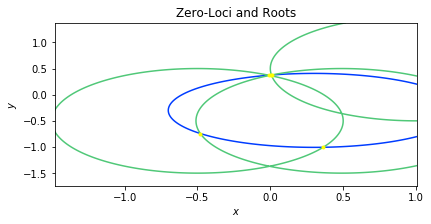

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[2.49517693e-12 7.50646426e-11 3.35413250e-08 2.82031429e-09]
YRoots Residuals
Residuals for f: [1.00955910e-11 8.95661323e-12 2.70117262e-12 4.33497682e-12]
Residuals for g: [5.80680083e-14 6.64192678e-13 4.24464055e-14 2.85913837e-12]
Chebfun2 Residuals
Residuals for f: [4.44089210e-16 4.44089210e-16 1.11022302e-16 8.88178420e-16]
Residuals for g: [5.71256418e-16 6.30208728e-17 5.73352258e-17 2.21695281e-17]


In [18]:
#01
f = lambda x,y: ((x-.3)**2+2*(y+0.3)**2-1)
g = lambda x,y: ((x-.49)**2+(y+.5)**2-1)*((x+0.5)**2+(y+0.5)**2-1)*((x-1)**2+(y-0.5)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 8764
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.7303 97.1132  1.7686  0.388   0.    ]


<Figure size 3600x2400 with 0 Axes>

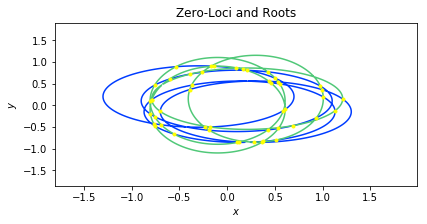

Number of roots: 45
Number found by yroots: 45
Distance between chebfun solutions and yroots solutions:
[3.73042988e-11 9.44886518e-11 1.96381636e-08 1.05021044e-08
 6.14323927e-11 1.10092209e-10 1.30292462e-10 2.03613561e-11
 1.55619796e-10 1.91001761e-10 1.96926271e-10 7.22916974e-11
 1.75652068e-10 5.56764366e-11 2.04424745e-10 3.63595029e-11
 2.83209572e-10 1.29182458e-10 4.29823794e-11 1.35864983e-11
 4.11810562e-10 3.64070189e-10 1.58799832e-10 3.25155455e-08
 1.72645936e-08 7.36521676e-10 1.06437698e-10 3.99043789e-10
 2.86604571e-10 2.95319730e-10 6.69380339e-10 6.09154379e-11
 2.15165913e-10 2.23871827e-10 1.31507445e-10 1.77094963e-10
 1.44743961e-10 5.48152531e-10 6.58851039e-11 1.66127137e-10
 3.97589843e-10 1.12208697e-10 1.62822752e-11 1.52912787e-11
 1.71789755e-11]
YRoots Residuals
Residuals for f: [3.58470153e-13 3.68760021e-12 1.01889136e-11 3.58192641e-13
 1.14910501e-12 6.32013660e-12 1.37253620e-12 1.48791966e-12
 4.44851816e-12 8.48566996e-13 3.12095718e-12 1.3484

In [19]:
#02
f = lambda x,y: ((x-0.1)**2+2*(y-0.1)**2-1)*((x+0.3)**2+2*(y-0.2)**2-1)*((x-0.3)**2+2*(y+0.15)**2-1)*((x-0.13)**2+2*(y+0.15)**2-1)
g = lambda x,y: (2*(x+0.1)**2+(y+0.1)**2-1)*(2*(x+0.1)**2+(y-0.1)**2-1)*(2*(x-0.3)**2+(y-0.15)**2-1)*((x-0.21)**2+2*(y-0.15)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

print_residuals([f,g], r1, r2)

# `test_roots04`

Percent Finished: 100%         
Total intervals checked was 1189
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 3.1119 95.122   1.7662  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

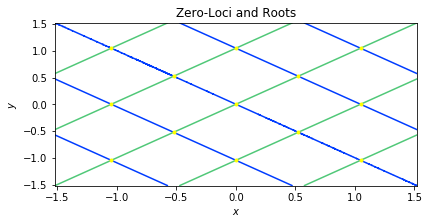

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[2.59693293e-13 2.05211084e-13 1.10879644e-14 2.35513869e-14
 4.71027738e-16]
YRoots Residuals
Residuals for f: [9.87102693e-14 4.36317649e-13 4.36317649e-13 4.70378487e-14
 1.10299513e-12]
Residuals for g: [0.00000000e+00 4.33553533e-13 4.33553533e-13 5.08219768e-21
 0.00000000e+00]
Chebfun2 Residuals
Residuals for f: [7.65713740e-16 0.00000000e+00 4.39677899e-18 0.00000000e+00
 7.65713740e-16]
Residuals for g: [0.00000000e+00 7.65713740e-16 1.83560134e-17 7.65713740e-16
 0.00000000e+00]


In [20]:
#01
f = lambda x,y: np.sin(3*(x+y))
g = lambda x,y: np.sin(3*(x-y))

r1 = np.loadtxt('chebfun_test_output/cftest4_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

In [4]:
#02

#FREEZES

# This one can't seem to get an accurate approximation no matter how much it subdivides. 
# We find that np.sum(np.abs(coeff2)) > 1.e-8
# no matter what level (tried up to 35) or what the target degree is (I've tried 9, 2, 100, et al.)

f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
                ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
                2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
                ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
                (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
                6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
                275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
                (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
                (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
                9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
                320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
                ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
                (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
                (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
                5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
                61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
                3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
                x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
                (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))

r1 = np.loadtxt('chebfun_test_output/cftest4_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)
r2 = yr.solve([f,g],a-1e-5,b+1e-5,plot=True)
r2 = rootfilter(r2,a,b,1e-5)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

Percent Finished: 0.0%       

KeyboardInterrupt: 

# `test_roots05`

Percent Finished: 100%         
Total intervals checked was 9394
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [15.4354 82.7762  1.7884  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

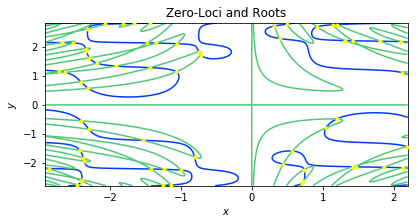

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[4.94172428e-12 2.07013079e-12 1.66836469e-12 2.96133638e-12
 1.52290939e-11 1.06004255e-12 2.13146741e-12 3.71487260e-13
 5.79259726e-12 1.21686324e-11]
YRoots Residuals
Residuals for f: [3.11639603e-12 3.91908728e-14 3.34565708e-12 3.27626815e-13
 1.04552478e-12 7.60030927e-12 7.99216249e-12 2.73137069e-12
 7.98811017e-12 2.14550600e-13]
Residuals for g: [1.41200385e-11 2.50244270e-12 8.58946247e-12 1.51643142e-11
 4.65683048e-12 9.92717020e-12 9.00723940e-13 4.10860235e-12
 1.64201985e-13 1.60425007e-11]
Chebfun2 Residuals
Residuals for f: [4.84057239e-14 3.50275364e-14 1.13797860e-14 4.32986980e-15
 1.24900090e-15 1.08246745e-15 1.26565425e-14 8.43769499e-15
 5.32907052e-15 1.13242749e-14]
Residuals for g: [7.32747196e-14 6.98330282e-14 9.62563362e-14 1.38111744e-13
 1.35447209e-14 1.99840144e-14 2.52020627e-14 1.01030295e-14
 8.88178420e-16 2.22044605e-15]


In [21]:
#01
f = lambda x,y: 2*x*y*np.cos(y**2)*np.cos(2*x)-np.cos(x*y)
g = lambda x,y: 2*np.sin(x*y**2)*np.sin(3*x*y)-np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest5_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots06`

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

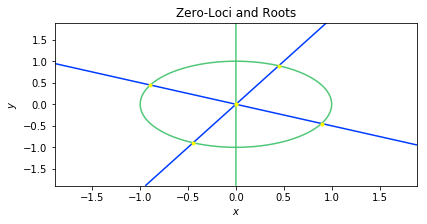

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-1.39230657e-22 -3.63863365e-07]
 [ 1.39230657e-22  3.63863365e-07]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
YRoots Residuals
Residuals for f: [2.97904098e-15 3.72380123e-16 6.20633538e-15 6.70284221e-15
 1.32396548e-13 1.32396549e-13]
Residuals for g: [4.36926011e-15 3.97205465e-15 3.47554781e-15 3.07834235e-15
 1.39230657e-22 1.39230657e-22]
Chebfun2 Residuals
Residuals for f: [0.0000000e+00 0.0000000e+00 1.1326999e-16 0.0000000e+00 0.0000000e+00]
Residuals for g: [1.98602732e-16 9.93013661e-17 9.89338159e-18 9.93013661e-17
 1.98602732e-16]


In [22]:
#01
f = lambda x,y: (y - 2*x)*(y+0.5*x)
g = lambda x,y: x*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

print_residuals([f,g], r1, r2)

Here we find that YRoots and Chebfun find the exact same roots except for the roots at (0,0). YRoots, for some reason, finds two roots close to (0,0), where we would expect only one root.

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

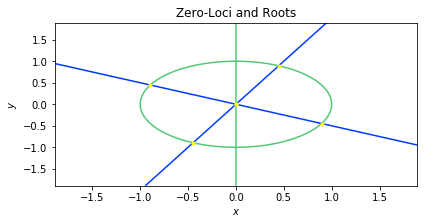

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 1.00000000e-04 -5.00000035e-05]
 [ 1.00000000e-04  2.00000003e-04]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
YRoots Residuals
Residuals for f: [1.24126708e-15 1.24126708e-15 2.65631154e-14 8.70402839e-16
 8.70558507e-16 2.59424819e-14]
Residuals for g: [4.96617853e-16 2.68053737e-15 6.30634174e-14 3.06964736e-17
 6.24906996e-17 6.43400910e-14]
Chebfun2 Residuals
Residuals for f: [0.0000000e+00 0.0000000e+00 1.1326999e-16 0.0000000e+00 0.0000000e+00]
Residuals for g: [1.98624937e-16 9.93235706e-17 1.00000000e-04 9.92791617e-17
 1.98580528e-16]


In [23]:
#02

# We actually find two where there should be two!

f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

print_residuals([f,g], r1, r2)

We see that YRoots finds two roots near the origin, where there should be two. The line $(x - .0001)$ and the lines $(y - 2*x)$ and $(y+.5*x)$ should have intersections at $(.0001, .0002)$ and $(.0001, .00005)$, respectively. YRoots finds these roots.

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

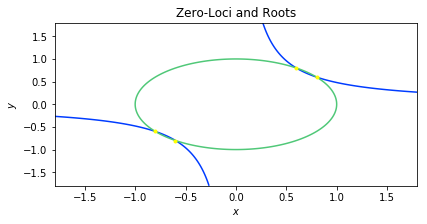

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[4.00296604e-16 8.67111902e-16 1.77635684e-15 1.55431223e-15]
YRoots Residuals
Residuals for f: [1.42108547e-14 3.55271368e-15 5.32907052e-15 1.77635684e-14]
Residuals for g: [0.00000000e+00 6.66133815e-16 4.44089210e-16 6.66133815e-16]
Chebfun2 Residuals
Residuals for f: [5.32907052e-15 5.32907052e-15 5.32907052e-15 5.32907052e-15]
Residuals for g: [4.4408921e-16 4.4408921e-16 4.4408921e-16 4.4408921e-16]


In [24]:
#03


f = lambda x,y: 25*x*y - 12
g = lambda x,y: x**2+y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest6_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots07`

Percent Finished: 100%         
Total intervals checked was 61891
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [3.20000e-03 6.68498e+01 3.30581e+01 8.89000e-02 0.00000e+00]


<Figure size 3600x2400 with 0 Axes>

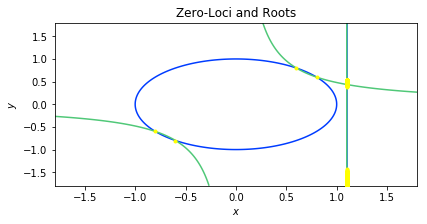

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[4.93642273e-09 4.82259824e-09 1.15718697e-08 1.19098713e-08]
YRoots Residuals
Residuals for f: [1.46811577e-09 9.80599605e-10 4.23912716e-09 1.89226574e-09]
Residuals for g: [1.62746343e-08 1.66240977e-09 1.23265185e-08 5.63497891e-08]
Chebfun2 Residuals
Residuals for f: [8.43769499e-16 2.26485497e-15 2.22044605e-16 1.33226763e-16]
Residuals for g: [1.01252340e-14 3.62376795e-14 2.66453526e-15 1.59872116e-15]


In [20]:
#01

#FREEZES

# Builds a singular matrix although it can get an accurate Chebyshev approximation 
# on its first level.

f = lambda x,y: (x**2+y**2-1)*(x-1.1)
g = lambda x,y: (25*x*y-12)*(x-1.1)

r1 = np.loadtxt('chebfun_test_output/cftest7_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True, approx_tol=1.e-6) # NOTE THE CHANGED APPROX_TOL
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

In [25]:
#02

#Freezes
# This one just doesn't get an acucrate enough approximation until the level is past 22, most often falling
# somewhere between 23-25.

f = lambda x,y: y**4 + (-1)*y**3 + (2*x**2)*(y**2) + (3*x**2)*y + (x**4)
h = lambda x,y: y**10-2*(x**8)*(y**2)+4*(x**4)*y-2
g = lambda x,y: h(2*x,2*(y+.5))

r1 = np.loadtxt('chebfun_test_output/cftest7_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)

r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

[-0.88004961 -0.44790238]
[0.88004961 0.03588643]
Percent Finished: 15.34%       

KeyboardInterrupt: 

In [22]:
#03

#FAILS - This one just freezes up regardless of the given approx_tol. Unless approx_tol >> 1. :\
# This one cannot get an accurate approximation. The difference between f_2d - f_d is always ~30-33ish
# This doesn't work with deg 9. Gets worse with higher degree approx? The difference is proportional to
# the target degree.


c = 1.e-09
f = lambda x,y: np.cos(x*y/(c**2))+np.sin(3*x*y/(c**2))
g = lambda x,y: np.cos(y/c)-np.cos(2*x*y/(c**2))

r1 = np.loadtxt('chebfun_test_output/cftest7_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

[-5.00000000e-10 -7.85398163e-10]
[5.00000000e-10 7.85398163e-10]
Percent Finished: 0.0%       

KeyboardInterrupt: 

# `test_roots08`

Percent Finished: 100%         
Total intervals checked was 5482
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [16.8916 81.1565  1.9518  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

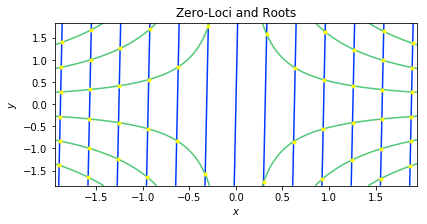

Number of roots: 8
Number found by yroots: 8
Distance between chebfun solutions and yroots solutions:
[2.35951048e-13 1.83028135e-12 7.13778304e-13 4.89667292e-12
 8.44080403e-12 9.61743438e-12 1.79013642e-12 1.81824267e-12]
YRoots Residuals
Residuals for f: [4.96167648e-15 2.02128620e-15 3.92010772e-15 6.43249060e-16
 4.68582146e-15 3.67394040e-16 1.53142748e-15 3.92010772e-15]
Residuals for g: [2.41445254e-11 3.46294643e-12 1.99468792e-12 4.22168026e-13
 3.33171806e-12 2.68700005e-11 3.53644319e-12 1.40077451e-11]
Chebfun2 Residuals
Residuals for f: [3.92010772e-15 3.67394040e-16 2.44929360e-16 2.90946462e-15
 2.90946462e-15 2.44929360e-16 3.67394040e-16 3.92010772e-15]
Residuals for g: [5.05321550e-16 5.05321550e-16 6.04901475e-16 3.82856870e-16
 3.82856870e-16 6.04901475e-16 5.05321550e-16 5.05321550e-16]


In [26]:
#01
f = lambda x,y: np.sin(10*x-y/10)
g = lambda x,y: np.cos(3*x*y)

r1 = np.loadtxt('chebfun_test_output/cftest8_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 3115
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [30.8828 67.5762  1.1236  0.4173  0.    ]


<Figure size 3600x2400 with 0 Axes>

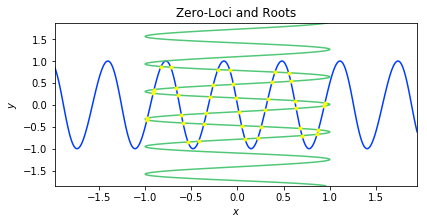

Number of roots: 39
Number found by yroots: 39
Distance between chebfun solutions and yroots solutions:
[4.97814496e-13 7.30434164e-13 2.43204864e-13 8.23968755e-13
 3.69018185e-12 6.20415447e-12 1.34830103e-12 1.67032119e-12
 5.32620456e-13 3.85636875e-12 1.27461688e-12 3.32408338e-12
 8.23073498e-12 7.02152427e-12 2.76618840e-12 1.95764958e-12
 1.27607870e-13 6.91818478e-12 3.04943681e-12 6.46778382e-12
 3.40989105e-12 1.62847270e-12 1.60542575e-12 2.55962022e-12
 2.21683167e-12 1.04673841e-12 4.20601839e-12 3.36169167e-12
 3.97447074e-12 1.09075136e-12 6.40469142e-13 1.30936495e-12
 1.29013293e-12 6.53223754e-13 3.35348973e-12 4.96578597e-12
 2.55660955e-12 7.05119870e-13 3.18734957e-12]
YRoots Residuals
Residuals for f: [4.33708625e-12 4.58189042e-13 4.39724646e-12 2.92782465e-11
 7.00572933e-12 1.20004284e-11 1.19072807e-12 1.11712722e-13
 1.31713668e-11 1.94619876e-11 3.66732200e-11 5.72875081e-12
 7.35100869e-12 1.94504135e-12 1.19527166e-11 1.33134059e-11
 1.73386860e-11 8.2773

In [27]:
#02
f = lambda x,y: np.sin(10*x-y/10) + y
g = lambda x,y: np.cos(10*y-x/10) - x

r1 = np.loadtxt('chebfun_test_output/cftest8_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots09`

Percent Finished: 100%       
Total intervals checked was 178
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [17.9775 79.7753  0.      2.2472  0.    ]


<Figure size 3600x2400 with 0 Axes>

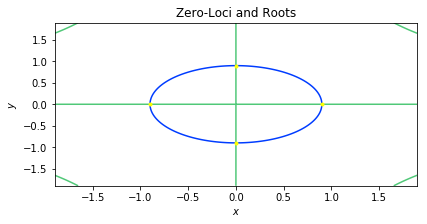

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[0.00000000e+00 2.18491583e-11 2.20715863e-11 0.00000000e+00]
YRoots Residuals
Residuals for f: [0. 0. 0. 0.]
Residuals for g: [1.39047122e-11 1.39047115e-11 1.40462577e-11 1.40462817e-11]
Chebfun2 Residuals
Residuals for f: [0. 0. 0. 0.]
Residuals for g: [6.70883460e-18 7.91633262e-18 3.11188399e-18 6.75112000e-18]


In [28]:
#01
f = lambda x,y: x**2+y**2-.9**2
g = lambda x,y: np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest9_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

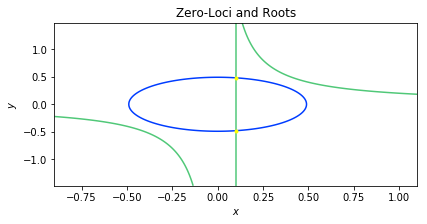

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[6.75322301e-16 3.46222298e-15]
YRoots Residuals
Residuals for f: [3.10862447e-15 2.77555756e-16]
Residuals for g: [4.21971514e-17 4.12950907e-17]
Chebfun2 Residuals
Residuals for f: [3.05311332e-16 0.00000000e+00]
Residuals for g: [1.23885272e-16 1.51909745e-16]


In [29]:
#02
f = lambda x,y: x**2+y**2-.49**2
g = lambda x,y: (x-.1)*(x*y-.2)

r1 = np.loadtxt('chebfun_test_output/cftest9_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots10`

Percent Finished: 100%         
Total intervals checked was 2176
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [30.4688 68.0147  1.5165  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

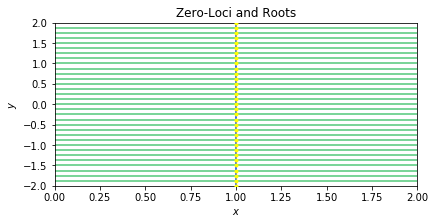

Number of roots: 17
Number found by yroots: 17
Distance between chebfun solutions and yroots solutions:
[5.51056601e-14 1.55225895e-13 7.83053608e-14 1.10467191e-13
 1.94209711e-14 2.25900923e-13 7.10032544e-14 2.81785234e-13
 3.54555505e-14 1.01780120e-13 9.46363095e-14 9.66937333e-14
 2.70786582e-13 5.67991662e-14 1.13561218e-13 1.75942889e-13
 1.98955714e-13]
YRoots Residuals
Residuals for f: [4.39967129e-13 9.36466802e-14 1.04267160e-13 5.81869097e-13
 1.06136189e-13 4.34881958e-14 4.52676187e-14 1.43212943e-14
 0.00000000e+00 2.79764818e-14 2.79594116e-14 2.19100834e-14
 1.56567359e-13 3.24703737e-14 1.28280203e-13 1.70980713e-13
 1.15632386e-13]
Residuals for g: [8.37134792e-14 2.05254854e-12 6.49057651e-12 2.40004337e-12
 1.93102661e-11 6.58924746e-12 6.54029855e-12 7.20307299e-12
 2.41907228e-12 2.11748374e-11 5.25202532e-12 1.66204912e-11
 1.29694021e-12 7.80276536e-12 5.36480714e-12 1.02530333e-11
 1.01733246e-12]
Chebfun2 Residuals
Residuals for f: [0. 0. 0. 0. 0. 0. 0. 0. 0

In [30]:
#01
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)

r1 = np.loadtxt('chebfun_test_output/cftest10_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)